##Setting up the environment

###Importing necessary libraries

In [1]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=e504ea420da40acbbfbc04f9123454c8da093f18a5a058707be3ef2fed7145c1
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from deepface import DeepFace
import shutil

25-03-06 17:49:24 - Directory /root/.deepface has been created
25-03-06 17:49:24 - Directory /root/.deepface/weights has been created


###Files system

In [3]:
# uncomment if you run the programm for the first time

# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Hyperparameters

In [4]:
PATH_TO_DB = "/content/gdrive/MyDrive/data_prof10/database_raw"
PATH_TO_TESTS = "/content/gdrive/MyDrive/data_prof10/tests"

##Preprocessing and predicting

Creating folders from account photos

In [39]:
def create_alumni_folder(photo_filename):
    # Extract surname and name from the filename
    # Assuming the format is "surname name.jpg"
    path = photo_filename[:photo_filename.rfind("/") + 1]
    photo_filename_short = photo_filename[photo_filename.rfind("/") + 1:]

    try:
        # Remove the file extension
        name_with_extension = os.path.splitext(photo_filename_short)[0]
        # Split the name into surname and name
        surname, name = name_with_extension.split(' ', 1)

        # Create the folder name
        folder_path = f"{surname} {name}"

        destination_path = path + folder_path

        # Create the alumni folder
        os.makedirs(destination_path, exist_ok=True)

        shutil.move(photo_filename, destination_path)

    except ValueError:
        print("Filename format is incorrect. Please ensure it is 'surname name.jpg'.")
    except Exception as e:
        print(f"An error occurred: {e}")

def create_folders(file_extension="jpg"):
  for filename in os.listdir(PATH_TO_DB):
        if filename.endswith(file_extension):
            photo_path = os.path.join(PATH_TO_DB, filename)
            create_alumni_folder(photo_path)


In [40]:
create_folders()

Герасимов Лев /content/gdrive/MyDrive/data_prof10/database_raw/Герасимов Лев
Дрозман Анна /content/gdrive/MyDrive/data_prof10/database_raw/Дрозман Анна
Белоусов Василий /content/gdrive/MyDrive/data_prof10/database_raw/Белоусов Василий
Чувашлов Анатолий /content/gdrive/MyDrive/data_prof10/database_raw/Чувашлов Анатолий
Гонтарь Тимур /content/gdrive/MyDrive/data_prof10/database_raw/Гонтарь Тимур


Converting images from RGB to Gray style

In [ ]:
def convert_to_black_and_white(image_path, output_path):
    # Read the image from the specified path
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not read the image.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save the black and white image to the specified output path
    cv2.imwrite(output_path, gray_image)

def process_images_in_folder(folder_path, output_folder, file_extension='.jpg'):
    # Убедитесь, что выходная папка существует
    os.makedirs(output_folder, exist_ok=True)

    # Проход по всем файлам и папкам в указанной папке
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(file_extension):
                input_path = os.path.join(root, filename)

                # Создание соответствующей структуры папок в выходной папке
                relative_path = os.path.relpath(root, folder_path)
                output_dir = os.path.join(output_folder, relative_path)
                os.makedirs(output_dir, exist_ok=True)

                output_path = os.path.join(output_dir, f"{filename}")
                convert_to_black_and_white(input_path, output_path)


Resperesentation

In [ ]:
def draw_result(results, image_path):
    if results:
        for i in range(len(results)):
            if results[i].shape[0] == 0:
                continue
            print("Prediction:", results[i].iloc[0]["identity"].split("/")[-2])

            plt.figure(figsize=(10, 5))  # Set the figure size

            # Display the first image
            plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
            plt.imshow(cv2.imread(image_path))

            # Display the second image
            plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
            plt.imshow(cv2.imread(results[i].iloc[0]["identity"]))

            # Show the combined images
            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()
    else:
        print("No matches found.")

Testing

In [ ]:
def make_prediction(image_path, draw=False):
    results = DeepFace.find(img_path=image_path,
                  db_path=PATH_TO_DB,
                  model_name="ArcFace",
                  detector_backend="retinaface")
    if draw:
        draw_result(results, image_path)

def run_tests():
    path_to_tests = "/content/gdrive/MyDrive/ML_prof10"
    num_tests = 4

    for filename in os.listdir(PATH_TO_TESTS):
        test_path = os.path.join(PATH_TO_TESTS, filename)
        make_prediction(test_path, draw=True)

In [ ]:
input_folder = '/content/gdrive/MyDrive/data_prof10'
output_folder = '/content/gdrive/MyDrive/data_prof10'
process_images_in_folder(input_folder, output_folder, file_extension='.jpg')

25-03-04 05:32:17 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations:   0%|          | 0/3 [00:00<?, ?it/s]

25-03-04 05:32:21 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5

  0%|          | 0.00/119M [00:00<?, ?B/s]
  0%|          | 524k/119M [00:00<00:39, 2.99MB/s]
  3%|▎         | 3.15M/119M [00:00<00:08, 12.9MB/s]
 11%|█▏        | 13.6M/119M [00:00<00:02, 45.0MB/s]
 20%|█▉        | 23.6M/119M [00:00<00:01, 63.3MB/s]
 27%|██▋       | 32.5M/119M [00:00<00:01, 70.8MB/s]
 37%|███▋      | 43.5M/119M [00:00<00:00, 82.7MB/s]
 44%|████▍     | 52.4M/119M [00:00<00:00, 83.7MB/s]
 53%|█████▎    | 62.9M/119M [00:00<00:00, 89.9MB/s]
 61%|██████    | 72.4M/119M [00:01<00:00, 90.6MB/s]
 69%|██████▉   | 81.8M/119M [00:01<00:00, 91.6MB/s]
 78%|███████▊  | 92.3M/119M [00:01<00:00, 93.7MB/s]
 86%|████████▌ | 102M/119M [00:01<00:00, 94.6MB/s] 
100%|██████████| 119M/119M [00:01<00:00, 79.3MB/s]


25-03-04 05:32:40 - arcface_weights.h5 will be downloaded to /root/.deepface/weights/arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /root/.deepface/weights/arcface_weights.h5

  0%|          | 0.00/137M [00:00<?, ?B/s]
  0%|          | 524k/137M [00:00<00:45, 3.01MB/s]
  2%|▏         | 3.15M/137M [00:00<00:10, 12.8MB/s]
 10%|▉         | 13.6M/137M [00:00<00:02, 47.1MB/s]
 16%|█▋        | 22.5M/137M [00:00<00:01, 60.8MB/s]
 25%|██▍       | 34.1M/137M [00:00<00:01, 77.2MB/s]
 31%|███▏      | 43.0M/137M [00:00<00:01, 79.9MB/s]
 40%|███▉      | 54.5M/137M [00:00<00:00, 90.7MB/s]
 47%|████▋     | 64.0M/137M [00:00<00:00, 88.6MB/s]
 55%|█████▍    | 75.0M/137M [00:01<00:00, 94.2MB/s]
 62%|██████▏   | 84.9M/137M [00:01<00:00, 93.2MB/s]
 70%|██████▉   | 95.4M/137M [00:01<00:00, 96.4MB/s]
 77%|███████▋  | 105M/137M [00:01<00:00, 93.4MB/s] 
 84%|████████▍ | 115M/137M [00:01<00:00, 95.1MB/s]
 91%|█████████▏| 125M/137M [00:01<00:00, 92.8MB/s]
100%|██████████| 137M/137M [00:01<00:00, 73.8MB/s]
Finding representations: 1

25-03-04 05:32:59 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:32:59 - Searching /content/gdrive/MyDrive/data_prof10/tests/aaa.jpg in 3 length datastore
25-03-04 05:33:41 - find function duration 87.90049457550049 seconds
Prediction: daniil


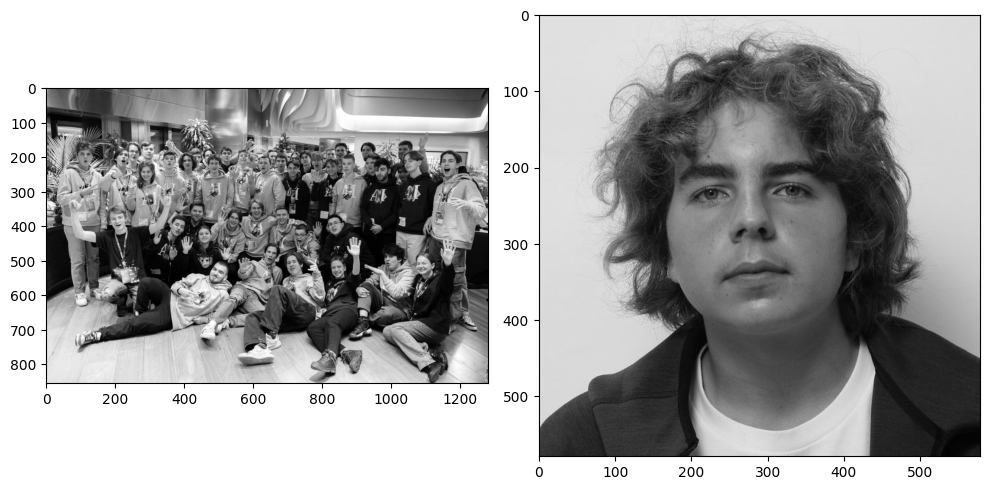

Prediction: daniil


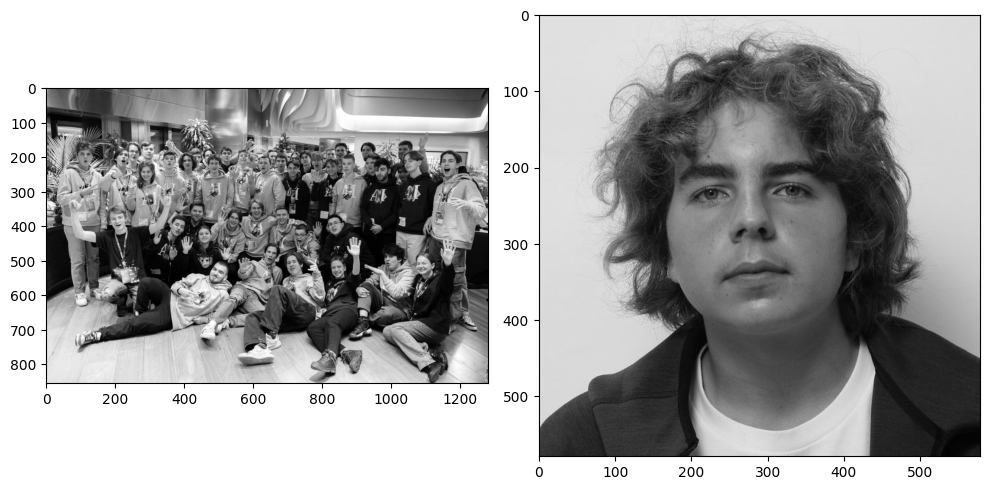

Prediction: andrew


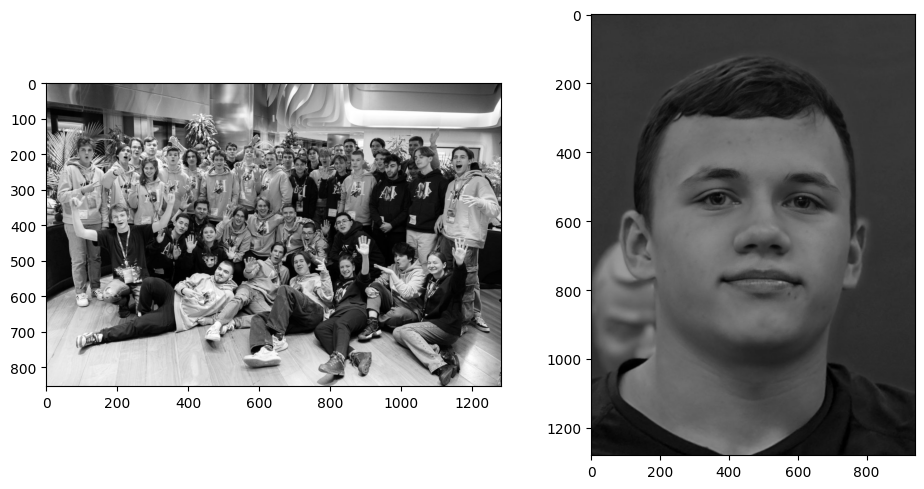

25-03-04 05:33:43 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:25<00:00,  8.35s/it]


25-03-04 05:34:08 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:34:08 - Searching /content/gdrive/MyDrive/data_prof10/tests/test4.jpg in 3 length datastore
25-03-04 05:34:17 - find function duration 34.398749351501465 seconds
Prediction: daniil


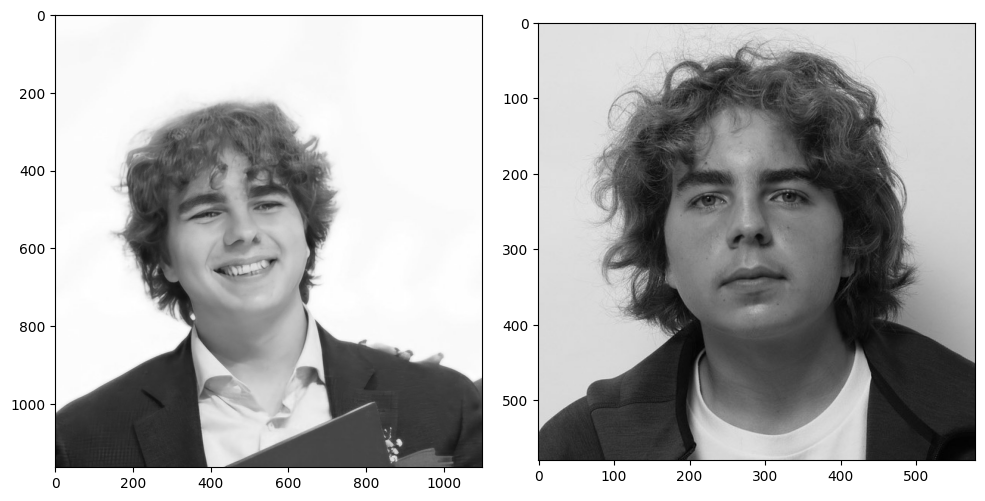

25-03-04 05:34:18 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:24<00:00,  8.26s/it]


25-03-04 05:34:43 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:34:43 - Searching /content/gdrive/MyDrive/data_prof10/tests/test2.jpg in 3 length datastore
25-03-04 05:34:51 - find function duration 33.23272132873535 seconds
Prediction: andrew


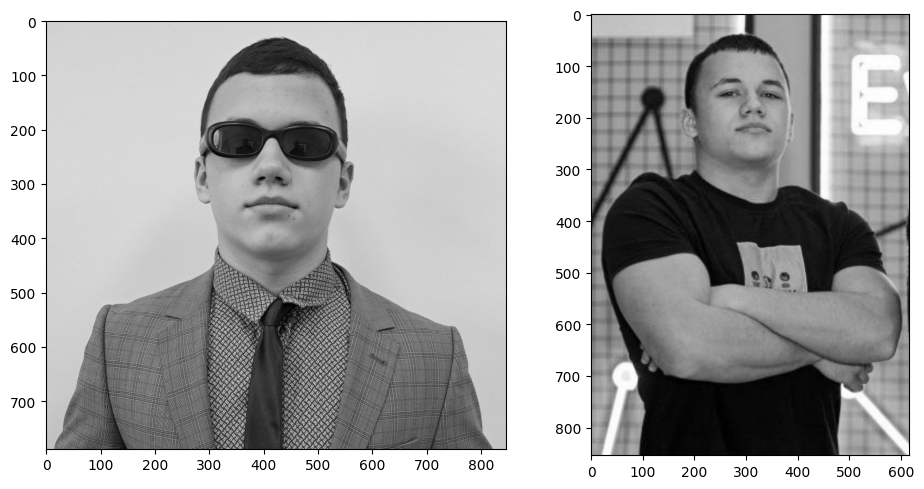

25-03-04 05:34:52 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:23<00:00,  7.73s/it]


25-03-04 05:35:15 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:35:15 - Searching /content/gdrive/MyDrive/data_prof10/tests/test3.jpg in 3 length datastore
25-03-04 05:35:24 - find function duration 32.32636737823486 seconds
Prediction: daniil


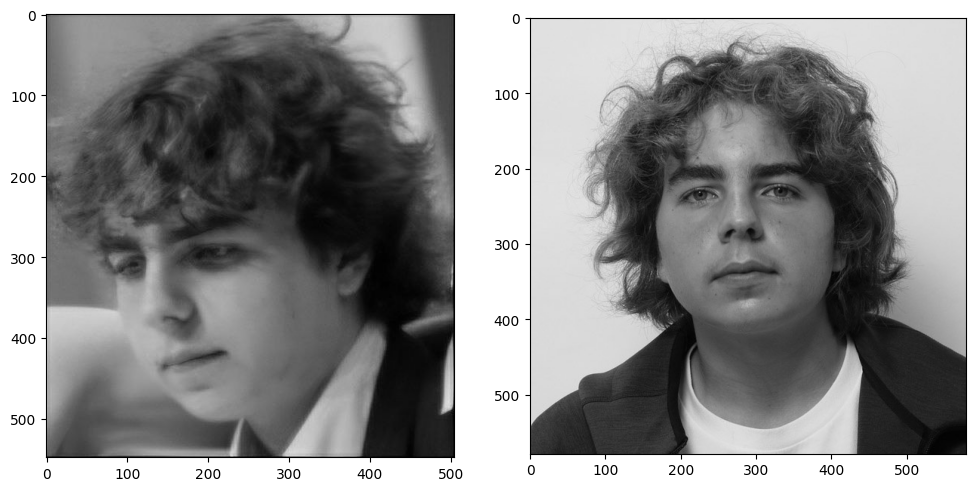

25-03-04 05:35:25 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:24<00:00,  8.07s/it]


25-03-04 05:35:49 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:35:49 - Searching /content/gdrive/MyDrive/data_prof10/tests/photo_5343581534550093804_y.jpg in 3 length datastore
25-03-04 05:35:58 - find function duration 33.547107458114624 seconds
Prediction: andrew


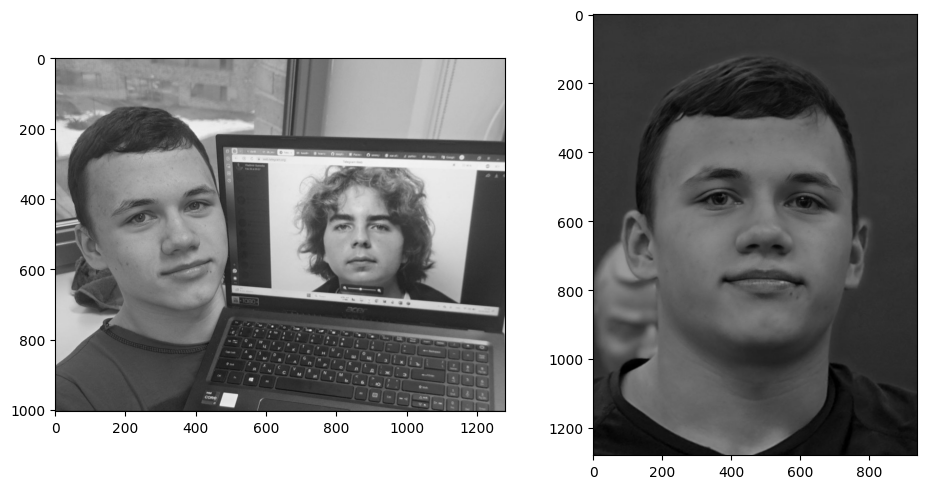

Prediction: daniil


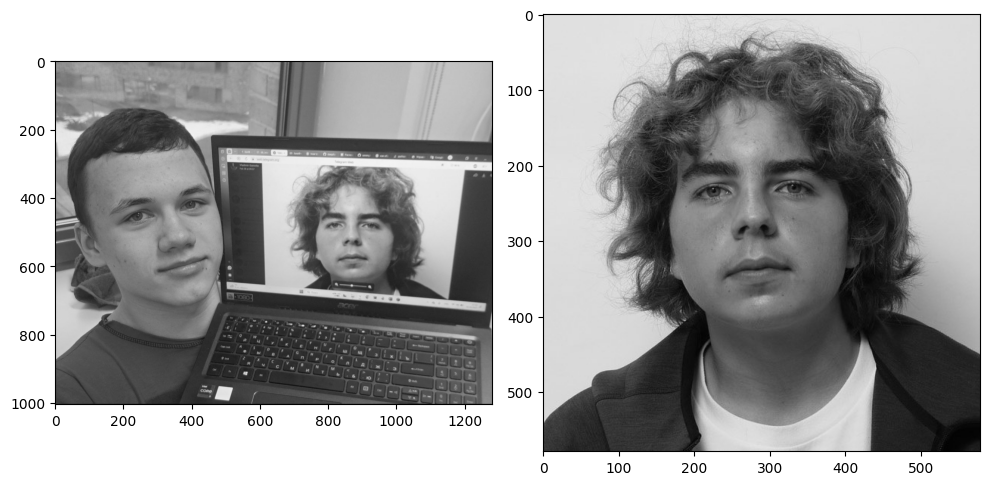

25-03-04 05:36:00 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:25<00:00,  8.35s/it]


25-03-04 05:36:25 - There are now 3 representations in ds_model_arcface_detector_retinaface_aligned_normalization_base_expand_0.pkl
25-03-04 05:36:25 - Searching /content/gdrive/MyDrive/data_prof10/tests/test1.jpg in 3 length datastore
25-03-04 05:36:36 - find function duration 36.62516140937805 seconds
Prediction: andrew


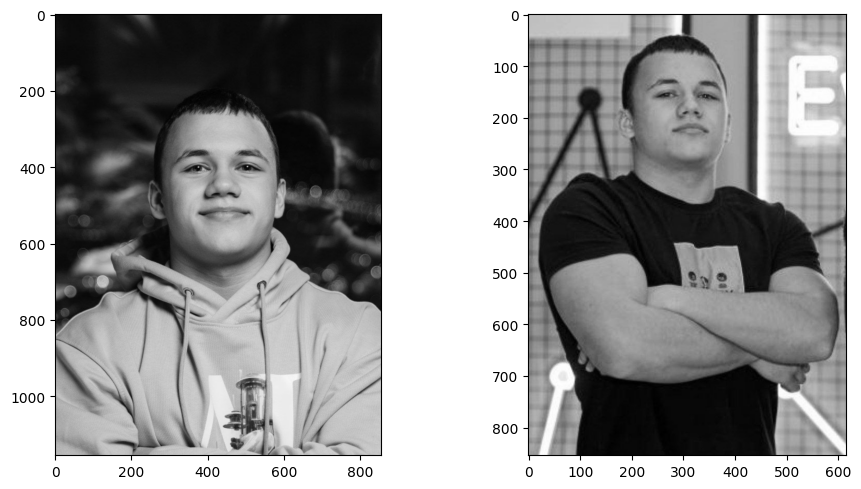

In [ ]:
run_tests()